In [115]:
library(tidyverse)
library(repr)
library(broom)
library(rvest)
options(repr.matrix.max.rows = 10) #limits output of dataframes to 10 rows

# Project Planning Stage

# Data Description:

#### Data Sources
This project will be conducted using the `players.csv` dataset.

#### Data Characteristics  
The `players.csv` represents 196 individuals with 7 features, including:
* `experience <chr>` - Player's experience
* `subscribe <lgl>` - Whether the player subscribed to a video game newsletter
* `hashedEmail <chr>` - Unique identifier for each player
* `played_hours <dbl>` - Total hours played
* `name <chr>` - First Name
* `gender <chr>` - Gender
* `age <dbl>` - Age in years

#### Data Summary
* `experience` is composed of
    * `Beginner`
    * `Amateur`
    * `Regular`
    * `Veteran`
    * `Pro`
* `subscribe` is composed of 52 `TRUE` and 144 `FALSE`  
* `gender` is composed of
    * `Male`
    * `Female`
    * `Non-binary`
    * `Two-Spirited`
    * `Agender`
    * `Other`
    * `Prefer not to say`
* `played_hours`
    * Maximum - 223.1 hours
    * Minimum - 0 hours
    * Average - 5.845918 Hours
* `Age`
    * Oldest - 50 years
    * Youngest - 8 years
    * Mean - 20.52 years
#### Potential Issues
* Column `Age` contains `NA`
* Dataset is male dominated
* Dataset is majority, Amateur players.
* Order of experience not specified, we will be assuming `Beginner -> Amateur -> Regular -> Pro -> Veteran`

# Questions: 
#### Broad Question
We are interested in which player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?  
#### Specific Question
How accurately can age, and hours played predict subscription to a game-related newsletter in `players.csv`? And how do they differ from player experience?
#### Data Sets
The `players.csv` dataframe can help us answer both our broad question and our specific question due to the data frame representing various individuals of different experience, age, hours played, and whether or not they subscribed.

# Exploratory Data Analysis and Visualization

In [143]:
url <- "https://raw.githubusercontent.com/ckwok07/DSCI100-Project-Planning-Stage-/refs/heads/main/data/players.csv"
players <- read_csv(url) |>
    filter(!is.na(Age))
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22


In [144]:
players_mean_values <- players |>
    group_by(experience, subscribe) |>
    summarize(played_hours_mean = mean(played_hours),
             Age = mean(Age))
players_mean_values

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,played_hours_mean,Age
<chr>,<lgl>,<dbl>,<dbl>
Amateur,FALSE,0.36666667,23.11111
Amateur,TRUE,8.27777778,19.11111
Beginner,FALSE,1.17500000,26.75000
Beginner,TRUE,1.27037037,20.14815
Pro,FALSE,0.57500000,18.00000
Pro,TRUE,3.76666667,16.44444
Regular,FALSE,0.02857143,23.71429
Regular,TRUE,23.40000000,19.82143
Veteran,FALSE,0.50666667,21.80000


#### Table above shows mean values based on experience and newsletter subscription.

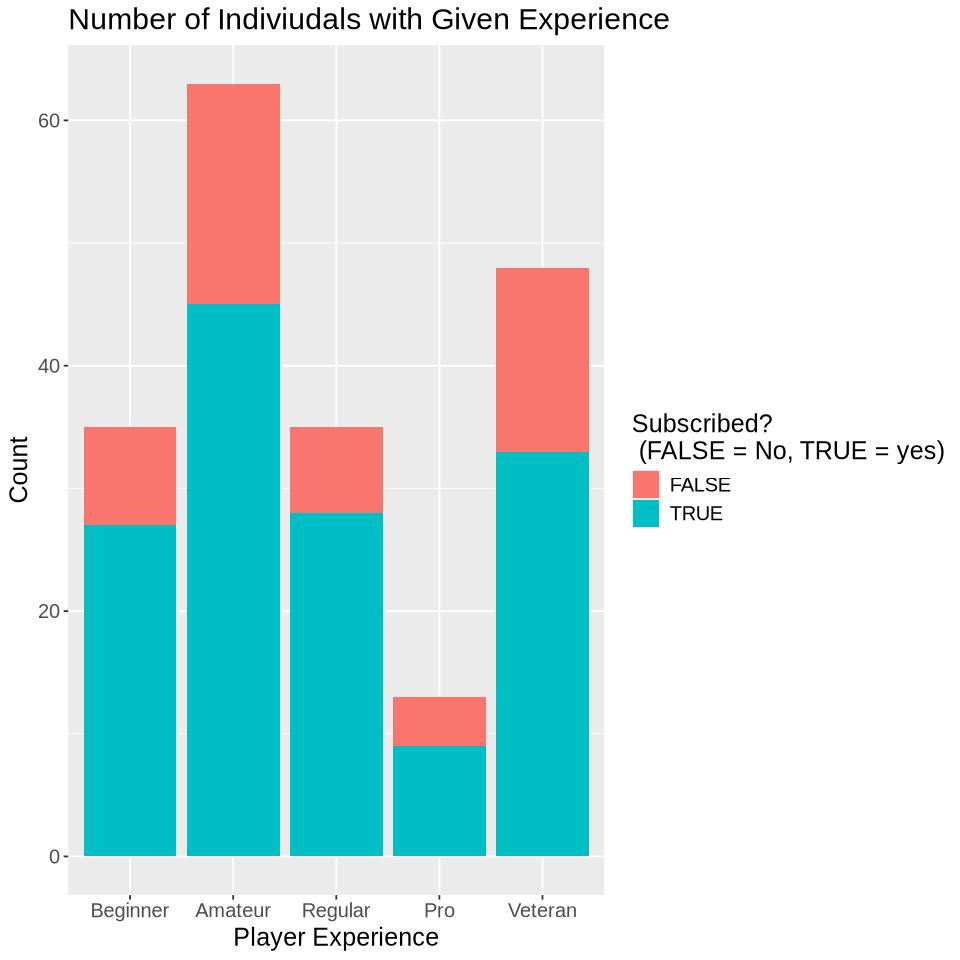

In [199]:
#players_exp <- players |>
#    factor(levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"), ordered = TRUE)
#players_exp
options(repr.plot.width = 8, repr.plot.height = 8)

players_exp_distrubition <- players |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(stat="count") +
    scale_x_discrete(limits = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")) +
    labs(title = "Number of Indiviudals with Given Experience", x = "Player Experience", y = "Count", fill = "Subscribed? \n (FALSE = No, TRUE = yes)") +
    theme(text = element_text(size = 15))
players_exp_distrubition

#### Visualization above shows the distrubution of player levels. We are unable to tell if this accurately depicts video game experience outside of `players.csv`.

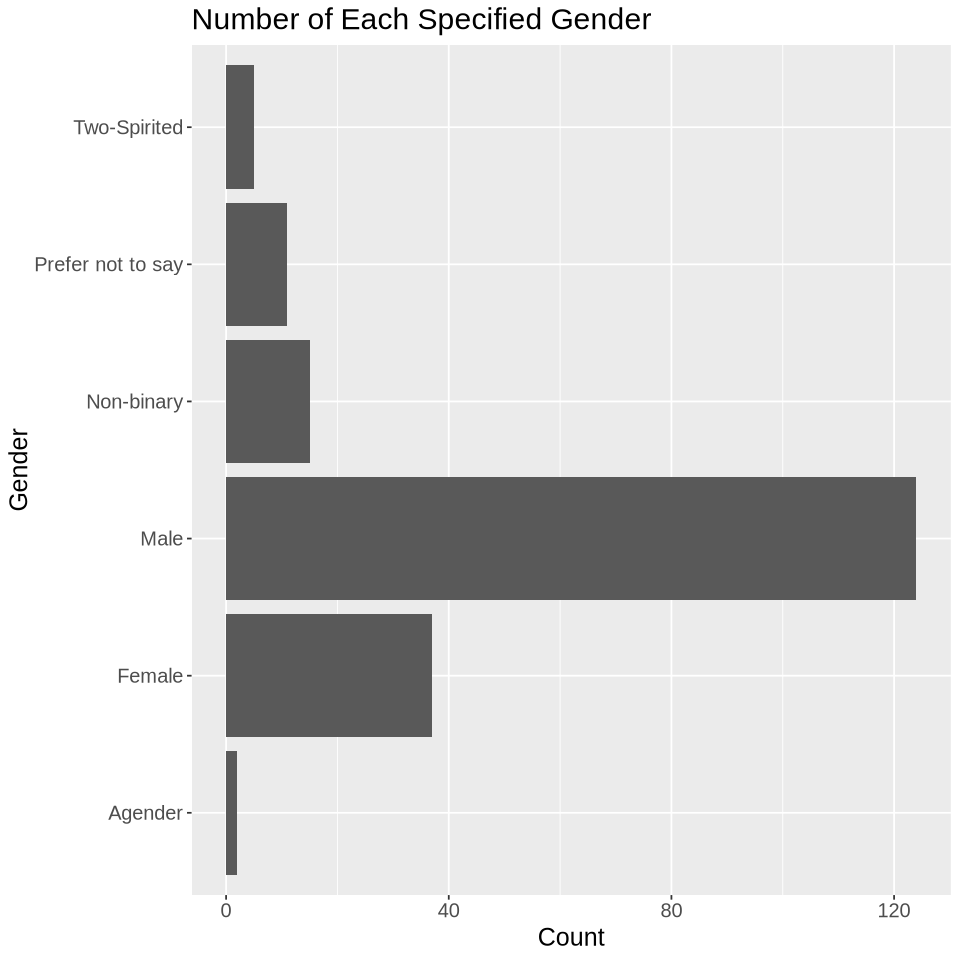

In [200]:
players_exp_distrubition <- players |>
    ggplot(aes(y = gender)) +
    geom_bar(stat="count") +
    labs(title = "Number of Each Specified Gender", y = "Gender", x = "Count") +
    theme(text = element_text(size = 15))
players_exp_distrubition

#### Visualization above shows the distrubution genders. We are unable to tell if this accurately depicts individual genders who play video games outside of `players.csv`

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


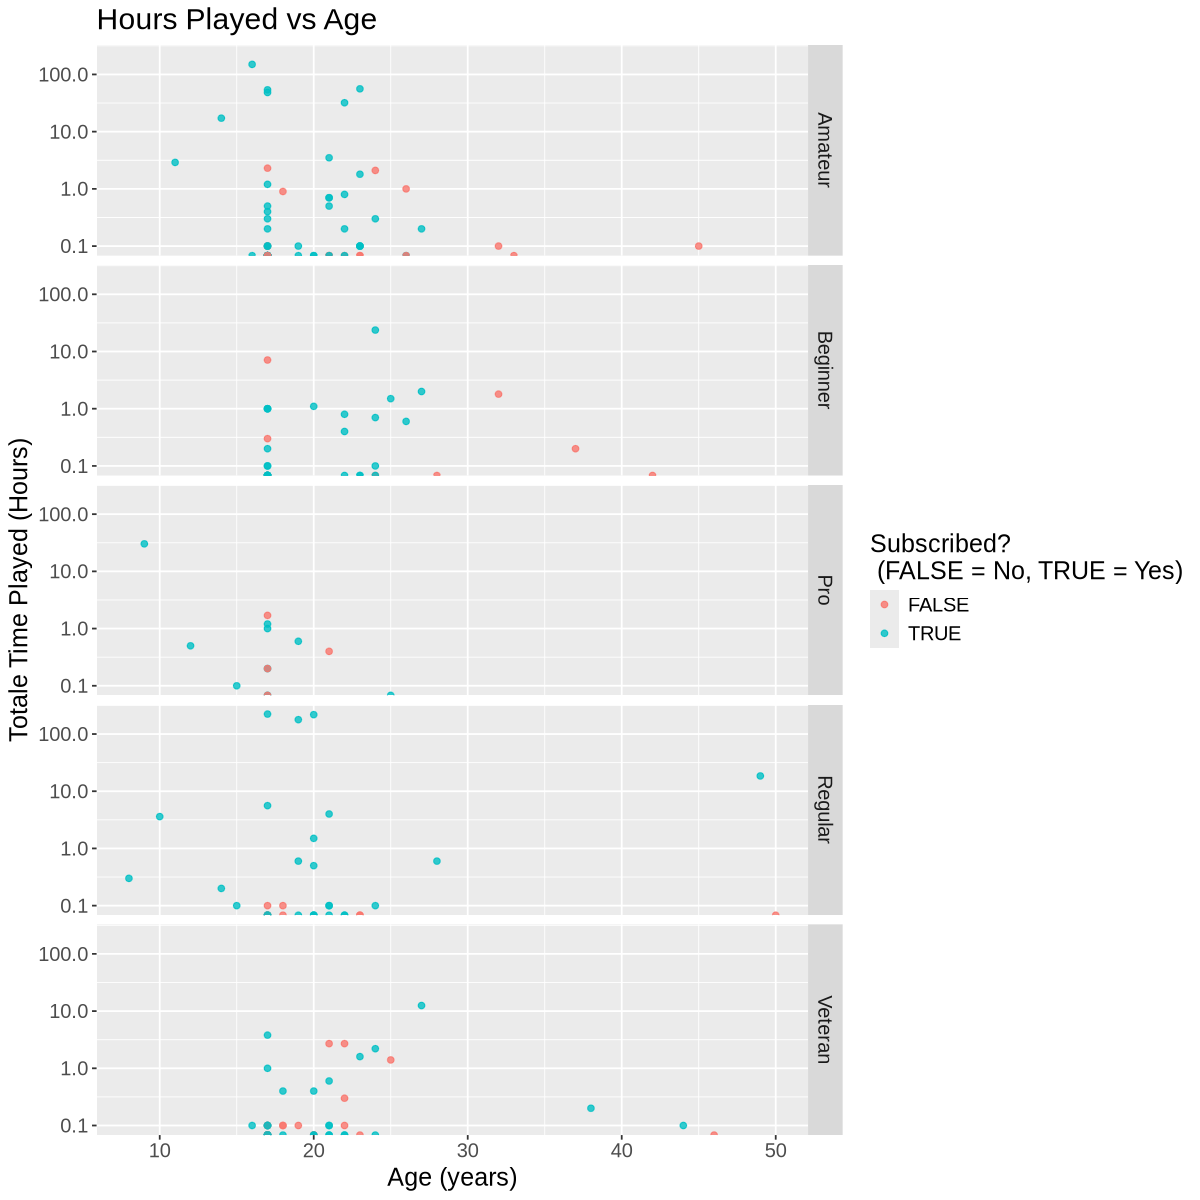

In [201]:
options(repr.plot.width = 10, repr.plot.height = 10)
players_sub_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.8) + 
    labs(title = "Hours Played vs Age", x = "Age (years)", y = "Totale Time Played (Hours)", color = "Subscribed? \n (FALSE = No, TRUE = Yes)") +
    scale_y_log10() +
    facet_grid(rows = vars(experience)) +
    theme(text = element_text(size = 15))
players_sub_plot

#### Visualization above shows the relationship between hours played, age, and whether the individual subscribed to the newsletter.

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


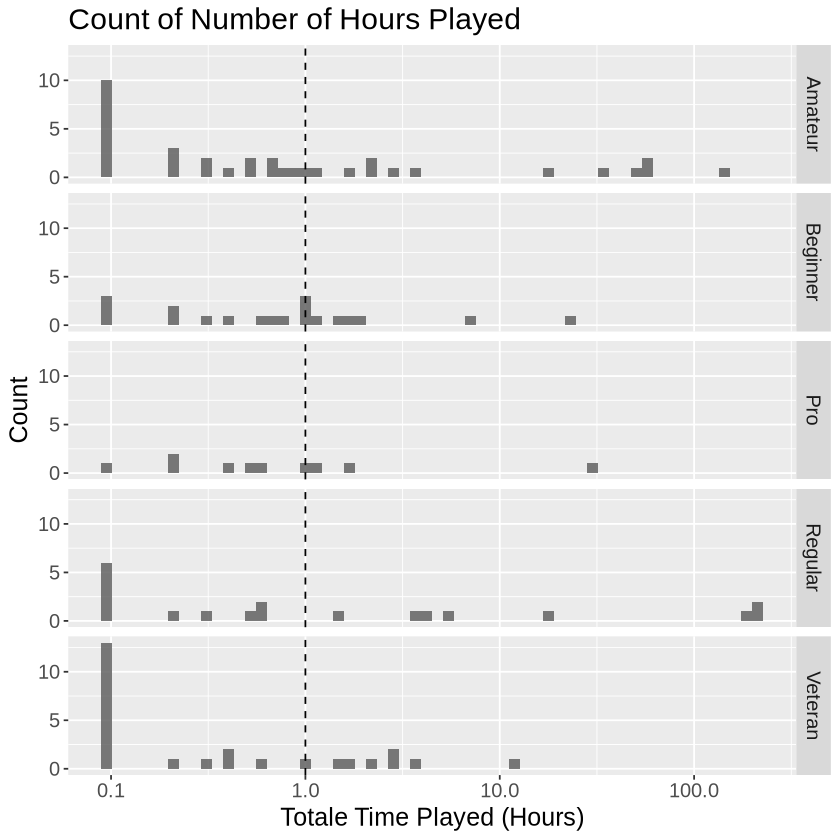

In [202]:
options(repr.plot.width = 7, repr.plot.height = 7)

#players_2 <- players |>
#    filter(played_hours > 1)
#players_2

players_playtime_plot <- players |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(bins = 60, position = "identity", alpha = 0.8) + 
    geom_vline(xintercept = 1, linetype = "dashed") +
    labs(title = "Count of Number of Hours Played", x = "Totale Time Played (Hours)", y = "Count") +
    facet_grid(rows = vars(experience)) +
    scale_x_log10() +
    theme(text = element_text(size = 15))
players_playtime_plot

#### Visualization above shows the distrubution of time played by experience level. Visually we can see that majority of individuals in `sessions.csv` played less than 1 hour throught the research study.

# Methods and Plan

I plan to use K-nearest-neighbors classification to predict `subscribe`. KNN classification was selected because `subscribe` has only 2 classes and KNN makes no assumptions about data distribution. We must assume that individuals will behave similarly in signing up for the newsletter. Other issues may include, having multiple variables for prediction can lower the accuracy of KNN classification and since variables have different scales, those with larger magnitudes will dominate the distance metric. In order to use KNN classification we will first split the dataset into 70% Training and 30% Testing sets. In addition to that, scaling, tuning and cross-validation will be performed to determine the most accurate k-value for our algorithm and ensure optimized accuracy, precision, and recall metrics.
